In [14]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [15]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':1 ,'B':0})
print(df.shape)

(569, 32)


In [16]:
arr2D = df.to_numpy()
columnIndex = 1
sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
numZeros = list(sortedArr[:, 1]).count(0)
benignDF, malignantDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:])
benignDF.columns = cols
malignantDF.columns = cols

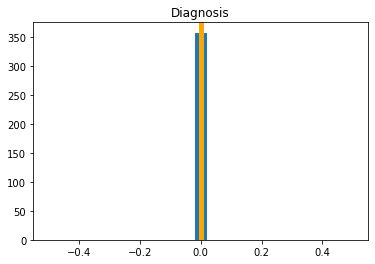

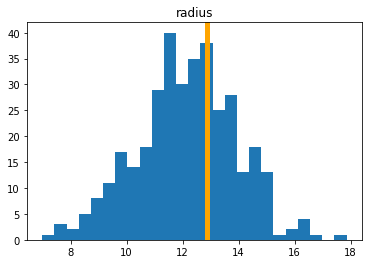

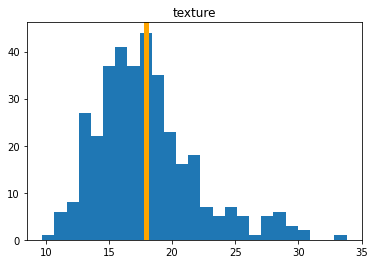

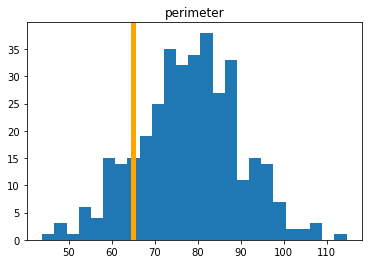

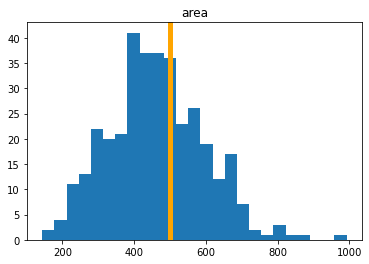

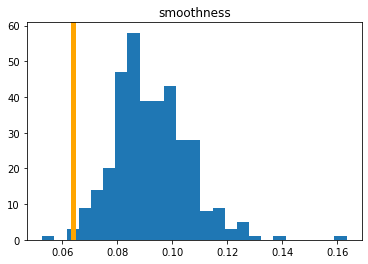

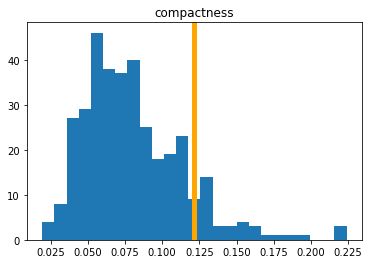

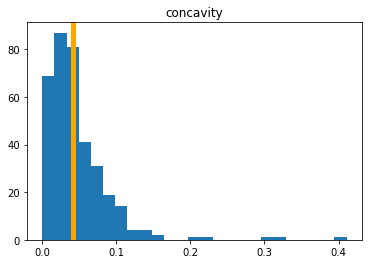

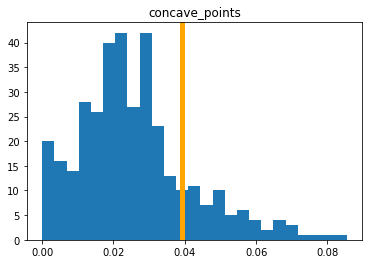

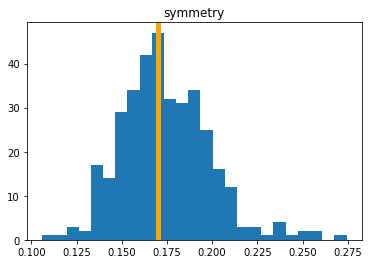

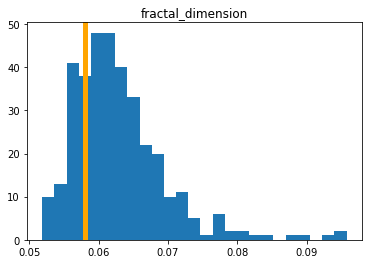

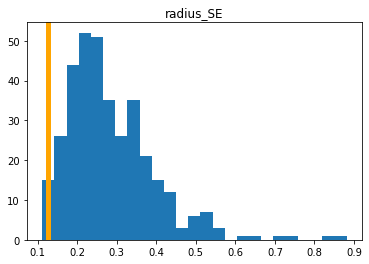

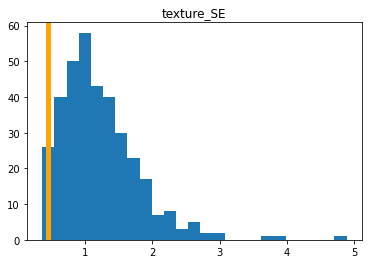

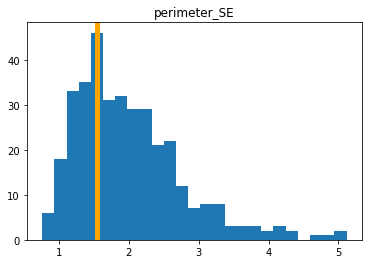

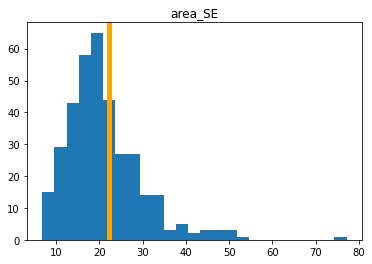

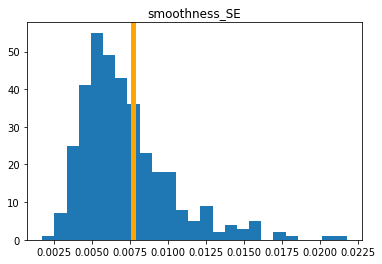

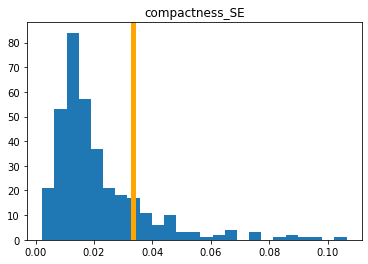

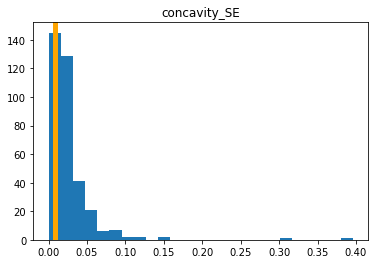

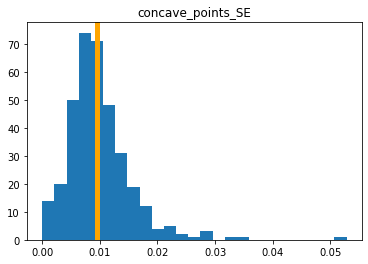

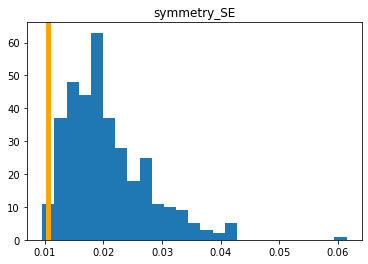

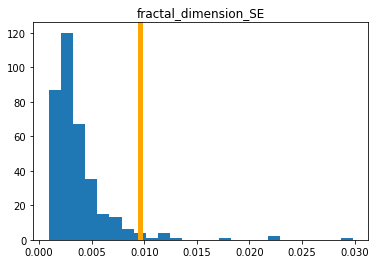

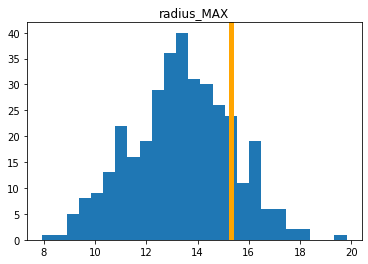

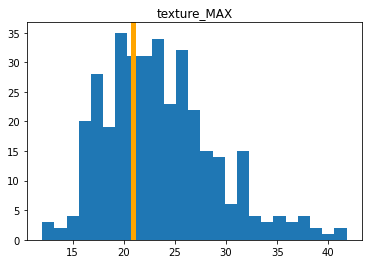

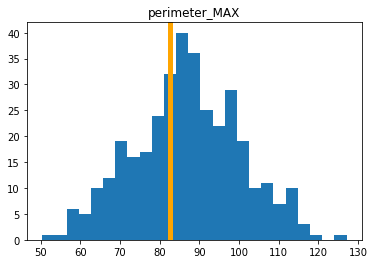

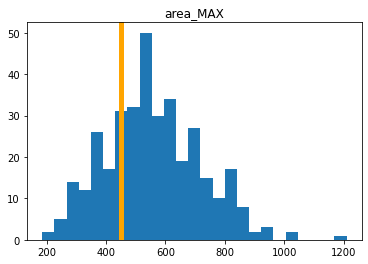

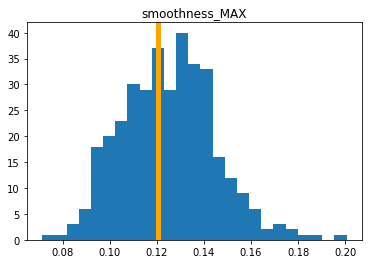

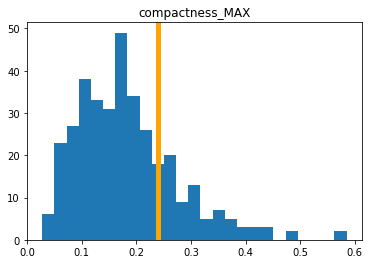

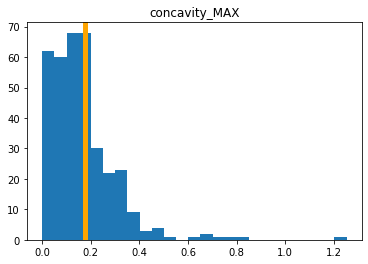

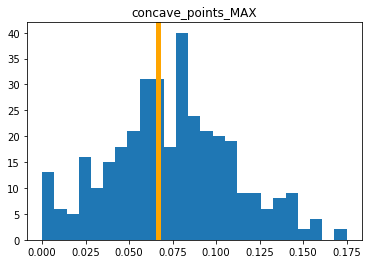

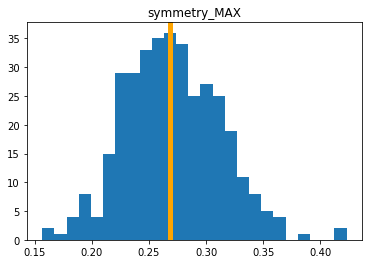

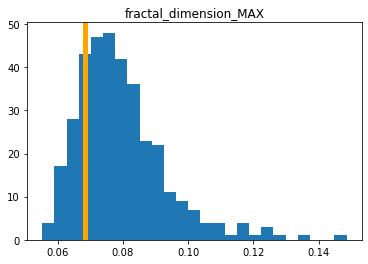

[0.0, 12.85026, 17.904, 65.033, 499.912, 0.063707, 0.12164, 0.04108, 0.0392564, 0.169954, 0.057996, 0.126892, 0.450696, 1.54198, 22.26976, 0.0077301, 0.0334964, 0.00792, 0.0095022, 0.01057742, 0.00957836, 15.3018, 20.948, 82.6198, 451.648, 0.1203534, 0.2391818, 0.17528, 0.0665, 0.268404, 0.0682846]


In [48]:
import random
from turtle import width

def generateNewFeatureVal(df, col, numberOfBins, showGraph=False):
    hist, bins = np.histogram(df[col], bins=numberOfBins)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(1)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    if showGraph:
        plt.hist(df[col], bins = bins)
        plt.axvline(random_from_cdf, color='orange', linewidth='5')
        plt.title(col)
        plt.show()
    return round(random_from_cdf[0], 8)

patientVal = []
for i in benignDF.columns[1:]:
    patientVal.append(generateNewFeatureVal(benignDF, i, 25, showGraph=True))
print(patientVal)